# Approach
本题类同129，需要找到所有从根节点到叶子的路径，因此是典型的回溯问题！回溯问题是一种DFS，因此本题只能从前中后序中选择！   

由于题目要求从根节点到叶子的路径，所以我们需要从根节点往下找，不断记录根节点的孩子，根节点孩子的孩子...因此本题需要前序遍历！ 

这种寻找路径的题目和797非常像！   

# Note     
前序遍历以及回溯的过程如图：
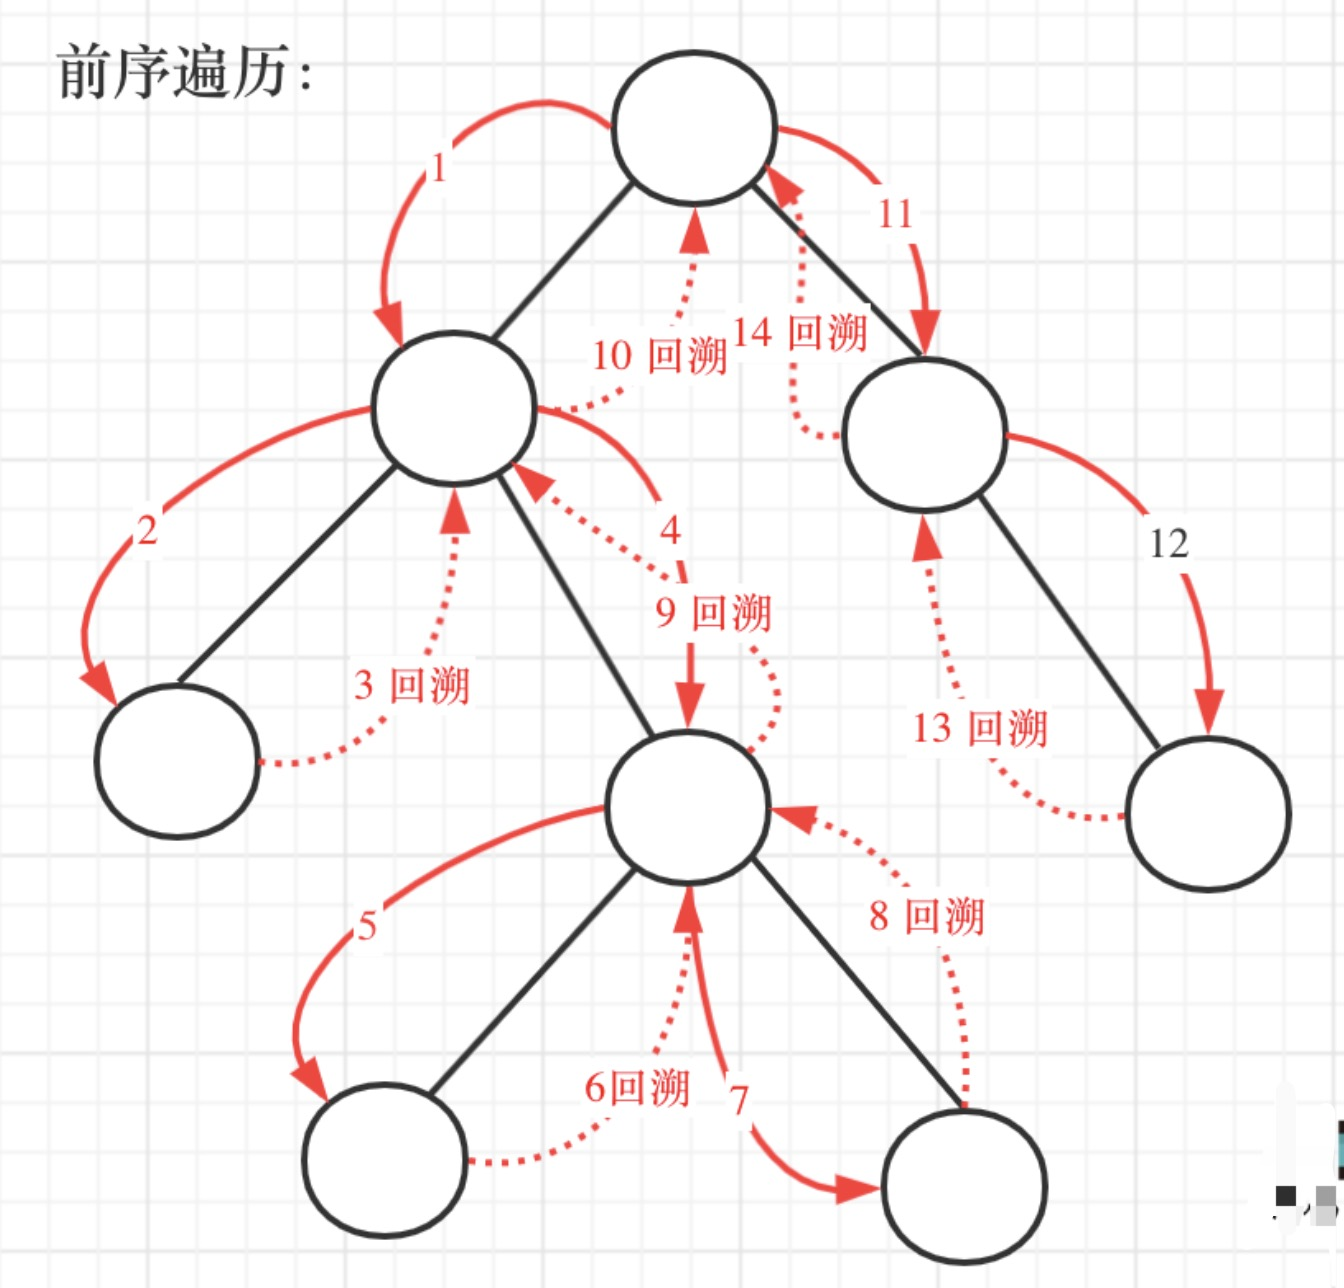

# Code

In [ ]:
# preorder, recursion
# 方法一：path是list！
class Solution:
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        if root == None:
            return []
        
        # 存储从root到当前node的路径！
        path = []
        # 存储所有从root到leaf的路径！
        result = []
        self.traversal(root, path, result)
        return result
    
    def traversal(self, node, path, result):
        # 中，将当前的node.val存入path
        path.append(node.val)
        
        # 如果该node是leaf，则此时的path就表示从root到leaf的路径！需要将path转化为题目要求的形式存入result中！
        if node.left == None and node.right == None:  
            strPath = "->".join(map(str, path))
            result.append(strPath)
            return
        
        # 左
        if node.left != None:
            # 递归
            self.traversal(node.left, path, result)
            # 回溯，由于path是list，list是mutable，因此path在递归中会发生改变！我们要将加进path的node.left.val移除！
            path.pop()
        
        # 右
        if node.right != None:
            self.traversal(node.right, path, result)
            path.pop()

# 类似797，更利于理解dfs的写法
class Solution:
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        if root == None:
            return []
    
        path = [root.val]
        result = []
        self.traversal(root, path, result)
        return result
    
    def traversal(self, node, path, result):
       
        if node.left == None and node.right == None:  
            strPath = "->".join(map(str, path))
            result.append(strPath)
            return
    
        if node.left != None:
            path.append(node.left.val)
            self.traversal(node.left, path, result)
            path.pop()
        
        if node.right != None:
            path.append(node.right.val)
            self.traversal(node.right, path, result)
            path.pop()

In [ ]:
# preorder, recursion
# 方法二：path是string！
class Solution:
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        if root == None:
            return []
        
        path = ""
        result = []
        self.traversal(root, path, result)
        return result

    def traversal(self, node, path, result):
        # 中
        path += str(node.val)
        
        # 如果该node是leaf，则此时的path就表示从root到leaf的路径！此时的path已经是题目要求的形式了！
        if node.left == None and node.right == None:  
            result.append(path)
            return
        
        # 注意下方的左和右分别代表两种回溯的写法！一种是明显的回溯，另一种是隐藏的回溯，两者都正确！
        
        # 左
        if node.left != None:
            path += "->"
            # 递归
            self.traversal(node.left, path, result)
            # 回溯，由于path是string，string是immutable，因此path在递归中不会发生改变！但是递归前path后面加了"->"，
            # 因此这里的回溯是将path里的"->"移除！
            path = path[ : -2]

        # 右
        if node.right != None:
            self.traversal(node.right, path + "->", result)
            # 不需要回溯！由于path是string，string是immutable，因此path在递归中不会发生改变！而且递归前也没有改变path，因此不需要回溯！
            # 仔细体会这里左和右的写法，理解为什么二者是等价的！

# 类似797，更利于理解dfs的写法
class Solution:
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        if root == None:
            return []
        
        path = str(root.val)
        result = []
        self.traversal(root, path, result)
        return result

    def traversal(self, node, path, result):
        
        if node.left == None and node.right == None:  
            result.append(path)
            return
        
        if node.left != None:
            strVal = str(node.left.val)
            path = path + "->" + strVal
            self.traversal(node.left, path, result)
            path = path[ : -(len(strVal) + 2)]

        if node.right != None:
            strVal = str(node.right.val)
            path = path + "->" + strVal
            self.traversal(node.right, path, result)
            path = path[ : -(len(strVal) + 2)]

In [ ]:
# preorder, iteration
class Solution:
    def binaryTreePaths(self, root: Optional[TreeNode]) -> List[str]:
        if root == None:
            return []
        
        stack = [root]
        # 对于stack中的每个node，path_lst的对应位置处存储了从root到该node的路径！！！
        # 因此stack和path_lst中的元素是一一对应的！
        path_lst = [str(root.val)]
        # 存储所有从root到leaf的路径！
        result = []

        while len(stack) != 0:
            node = stack.pop()
            # 表示root到刚刚pop出来的node的路径！
            path = path_lst.pop()
            
            if node.left == None and node.right == None:
                result.append(path)
            
            if node.right != None:
                stack.append(node.right)
                path_lst.append(path + "->" + str(node.right.val))
            if node.left != None:
                stack.append(node.left)
                path_lst.append(path + "->" + str(node.left.val))
        
        return result